In [179]:
## MP 573 Lecture 17: Intro to Wavelets
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
import scipy.io as sio
from scipy import signal
import pywt as wt

font = {'weight' : 'normal',
        'size'   : 18}

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

Text(0, 0.5, 'Signal')

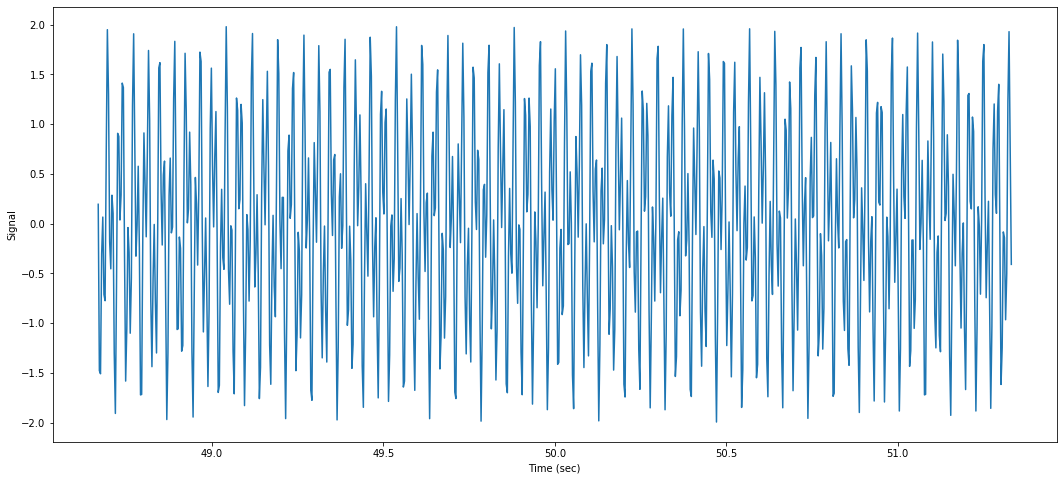

In [181]:
# Simulate 1D complex sinusoidal signal, and plot its real/imaginary values, and also magnitude/phase
N = 30000
tmax = 100
t = np.linspace(0,tmax,N)
u0 = 10 # This is the frequency of our complex exponential, in cycles per unit length
s = np.cos(2*np.pi*u0*t**1.4) + np.sin(2*np.pi*u0*t**1.2) # Note t^1.4 and t^1.2 signal behavior
# cos( 2 PI u0 t^1.4) = cos( 2 PI [u0 t^0.4] t ) 
#s[0:15000] = np.cos(2*np.pi*u0*t[0:15000])
#s[15000:N] = np.cos(2*np.pi*2*u0*t[15000:N])

plt.figure(figsize=(18,8))
plt.plot(t[14600:15400],s[14600:15400])
plt.xlabel('Time (sec)')
plt.ylabel('Signal')

Text(0, 0.5, 'DFT Signal')

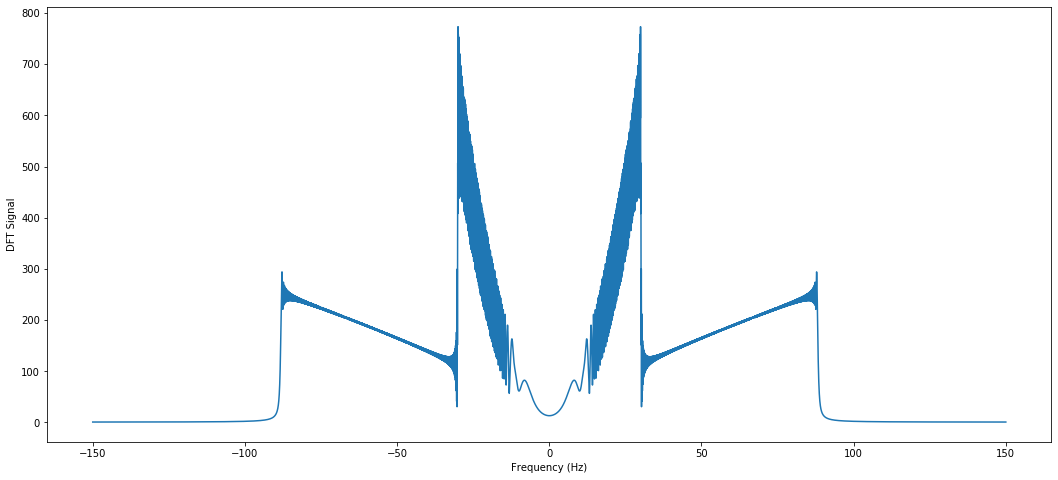

In [172]:
# Let's calculate an FFT
shat = np.fft.fftshift(np.fft.fft(s))
freq_range = 1/(t[1]-t[0])
freqs = np.linspace(-freq_range/2,freq_range/2,N)
plt.figure(figsize=(18,8))
plt.plot(freqs,abs(shat))
plt.xlabel('Frequency (Hz)')
plt.ylabel('DFT Signal')

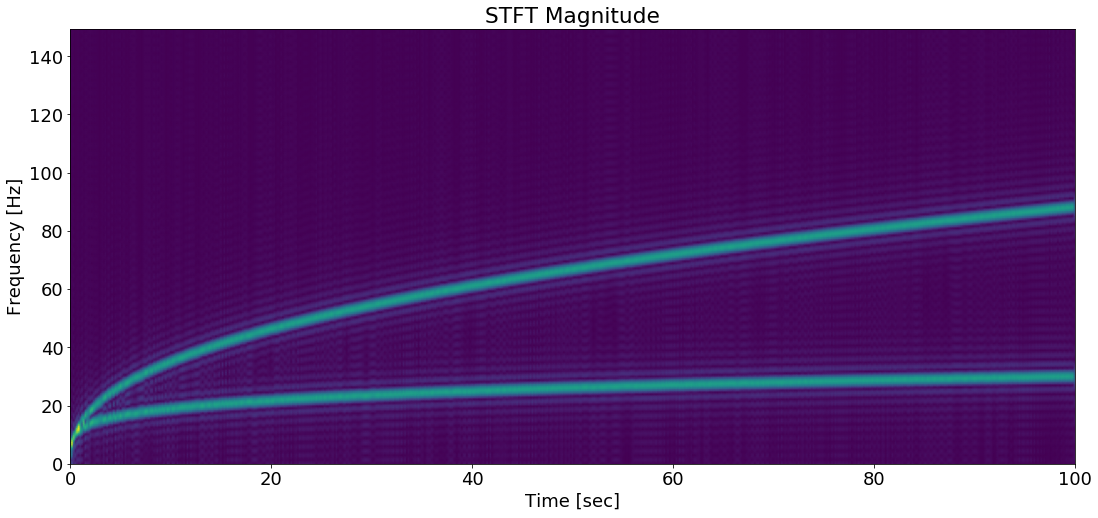

In [177]:
# Now let's do an STFT
segment_length = 100
fft_length = 5*segment_length
window_type = 'boxcar'
max_f = 150

f, t, Zxx = signal.stft(s, fs=N/tmax,nperseg=segment_length, nfft=fft_length, window=window_type)
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.pcolormesh(t, f[f<max_f], np.abs(Zxx[f<max_f,:]),shading='gouraud')
plt.title('STFT Magnitude')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


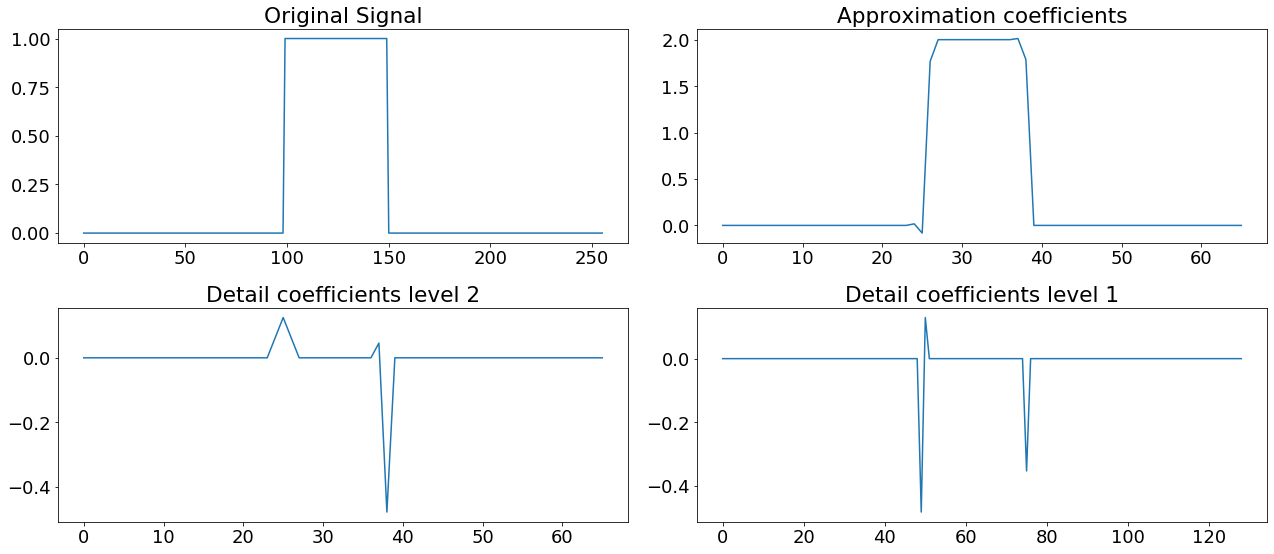

In [213]:
N = 256
f1 = np.zeros(N)
f1[99:150] = 1.0
coeffs = wt.wavedec(f1, 'db2',level=2)
cA2, cD2, cD1 = coeffs


# Plot original signals and convolutions
plt.figure(figsize=(18,8))
plt.rc('font', **font)
plt.subplot(2,2,1)
plt.plot(f1)
plt.title('Original Signal')

plt.subplot(2,2,2)
plt.plot(cA2)
plt.title('Approximation coefficients')

plt.subplot(2,2,3)
plt.plot(cD2)
plt.title('Detail coefficients level 2')

plt.subplot(2,2,4)
plt.plot(cD1)
plt.title('Detail coefficients level 1');
plt.tight_layout(pad=1.0)

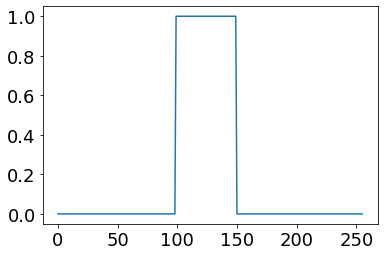

In [217]:
# Reconstruct signal from wavelet coefficients
f2 = wt.waverec(coeffs, 'db2')
plt.plot(f2);

In [250]:
# Load some image from file
data_dir = pjoin('.', 'data')
mat_fname = pjoin(data_dir, 'brain_orig.mat')
mat_contents = sio.loadmat(mat_fname)
mat_contents
f = mat_contents['im_mr']
sx,sy = f.shape

Text(0.5, 1.0, 'Wavelet decomposition')

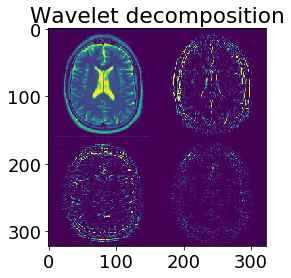

In [256]:
# Wavedec2
nLevels = 1
coeffs = wt.wavedec2(f, 'db2',level=nLevels)
#cA1, (cD1a, cD1b, cD1c) = coeffs
cArray,slices = pywt.coeffs_to_array(coeffs)
cArray[0:int(sx/2**nLevels), 0:int(sy/2**nLevels)] = cArray[0:int(sx/2**nLevels), 0:int(sy/2**nLevels)]/10


# Plot original signals and convolutions
plt.imshow(cArray,vmin=0,vmax=0.2)
plt.title('Wavelet decomposition')
